# Vladimir Nikiforov

### PART 0 - PREPARE ENV

In [1]:
# Stop previously runned server
!docker stop ht_pg_server
!docker rm $(docker ps -a -q)
!docker rmi $(docker images -q)

ht_pg_server
7a341d057b77
Untagged: postgres:11
Untagged: postgres@sha256:68b49a280d2fbe9330c0031970ebb72015e1272dfa25f0ed7557514f9e5ad7b7
Deleted: sha256:53912975086f1470f877922e3eb79c4f17c403fcb0b51b1f45df9b623987600e
Deleted: sha256:859135cc89a4161becb56082dc95772d26d157bc67622be28ccab159cee9c520
Deleted: sha256:85d5ba072f703aed8ed136ee24ef0a5c22fb818e307db40be0637df1691546fe
Deleted: sha256:44bc37a16317acf120ebcb0b8aa2cf8738f0dcc40ca47f18d9d5789099089cd0
Deleted: sha256:050e2fbc4c511fff109624929dcc24d61f4565052ffd6e30e3d46d42ce65c576
Deleted: sha256:6e7901ce413d382c6544cf07b5370341507a4734525947ecef28944c041e39b6
Deleted: sha256:c0d5a0e28851bc9a301c0cb92e03c036c1a4b0d8da1efc4a16a921abdd641e3e
Deleted: sha256:21cf04dd5b4e7ddbe4a7f122b532038c351eef9057ff71940a1a0a36069fabd5
Deleted: sha256:5eba02d7eb8edfd2d0c4503cd6976cfb526e96c4f62960bac5efdf86a1e71e4f
Deleted: sha256:0e0ff67afa7921baa6b3c7afd83664752663b5b8704c5236941359003e6f8887
Deleted: sha256:915e9e2c13848dc5933cea4c23b53649971

In [2]:
# Run the server:
!docker run -d --name ht_pg_server -v ht_dbdata:/var/lib/postgresql/data -p 54320:5432 postgres:11

Unable to find image 'postgres:11' locally
11: Pulling from library/postgres














Digest: sha256:68b49a280d2fbe9330c0031970ebb72015e1272dfa25f0ed7557514f9e5ad7b7
Status: Downloaded newer image for postgres:11
2c29cd9f9eb5147e143b784231842d32474fa6b25a8f43f3360ce5a246c3ff40


In [3]:
# Checking the logs to see if it is running:
!docker logs ht_pg_server

2019-08-04 12:29:54.298 UTC [1] LOG:  listening on IPv4 address "0.0.0.0", port 5432
2019-08-04 12:29:54.298 UTC [1] LOG:  listening on IPv6 address "::", port 5432
2019-08-04 12:29:54.305 UTC [1] LOG:  listening on Unix socket "/var/run/postgresql/.s.PGSQL.5432"
2019-08-04 12:29:54.331 UTC [26] LOG:  database system was shut down at 2019-08-04 12:29:24 UTC
2019-08-04 12:29:54.341 UTC [1] LOG:  database system is ready to accept connections


In [4]:
# Creating the database:
!docker exec -it ht_pg_server psql -U postgres -c "drop database ht_db"
!docker exec -it ht_pg_server psql -U postgres -c "create database ht_db"

DROP DATABASE
CREATE DATABASE


In [5]:
!cat ../code/etl.py

import psycopg2 as pg
import yaml
from pathlib import Path
import os
import pandas as pd

def create_tables(config, connection):
    cur = connection.cursor()
    for table in config:
        name = table.get('name')
        schema = table.get('schema')
        ddl = f"""CREATE TABLE IF NOT EXISTS {name} ({schema})"""
        cur.execute(ddl)

    connection.commit()
    cur.close()

def transform_tables(config):

    data_path = "../data/"

    for table in config:
        table_name = table.get('name')
        table_source = os.path.join(data_path,f"{table_name}.csv")
        table_cols = []
        for i in table.get('columns'):
            table_cols.append(str.upper(i))
        df = pd.read_csv(table_source)
        df_reorder = df[table_cols]  # rearrange column here
        df_reorder.to_csv(table_source, index=False)

def load_tables(config, connection):

    # iterate and load
    cur = connection.cursor()
    data_path = "../data/"

    for table in config:
        table_name

In [6]:
!python ../code/etl.py

/home/truename/anaconda3/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### PART I - DATABASES

In [7]:
import psycopg2

/home/truename/anaconda3/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [8]:
def get_values(table, connection: psycopg2.extensions.connection):
    c = connection.cursor()
    c.execute(f"SELECT * FROM {table};")
    result = c.fetchone()
    print(result)
    c.close()

In [9]:
# Create connection to DB
connection = psycopg2.connect(
    host='localhost',
    port=54320,
    dbname='ht_db',
    user='postgres',
)

In [10]:
# Test table Users
get_values("users", connection)

('1872820f-e3ac-4c02-bdc7-727897b60043', True, 'GB||JE||IM||GG', False, datetime.date(2018, 5, 25), datetime.datetime(2017, 8, 6, 7, 33, 33, 341000), 'ACTIVE', 'GB', 1971, 'PASSED', 0)


In [11]:
# Test table Transactions
get_values("transactions", connection)

('GBP', 175, 'COMPLETED', datetime.datetime(2017, 12, 20, 12, 46, 20, 294000), 'cafe', 'GBR', 'cont', '8f99c254-7cf2-4e35-b7e4-53804d42445d', 'CARD_PAYMENT', 'GAIA', 'b3332e6f-7865-4d6e-b6a5-370bc75568d8')


In [12]:
# Test table Countries
get_values("countries", connection)

('AF', 'Afghanistan', 'AFG', 4, 93)


In [13]:
# Test table Currency_details
get_values("currency_details", connection)

('AED', 2, False)


In [14]:
# Test table Fraudsters
get_values("fraudsters", connection)

('5270b0f4-2e4a-4ec9-8648-2135312ac1c4',)


In [15]:
# Close connection to DB
connection.close()

Database created and filled by data.

### PART II - EXPLORATION, ANALYSIS, MODELLING & OPERATIONALIZATION

The fraudsters table indicates some individuals who have been marked as fraudsters. The goal is to use the data and your knowledge of Revolut to design an ML algorithm to identify fraudsters and conduct necessary actions. You should be considering the consequential impact of the model and its decisions on all domains (e.g. customers, revolut brand, internal processes, etc.).

Unless explicitly stated, you do not have the read/write the data from/to the PostgreSQL database. Instead you may just utilize read_csv() methods in Pandas/Dask/anything else.

    a) Explore the data for identified fraudsters and other users. What are your preliminary observations? 

    b) Feature Engineering
        i) Utilizing your findings from part a) and some creativity, create some features. Explain your reasoning behind the features.
        ii) Make a features.py script which when executed will create these features and store them in the DB. 

    c) Model Selection/Validation
        i) Create an ML model which identifies fraudsters. Assess the quality of your model and explain.
        ii) Make a train.py file which generates the fitted model artifact (it should be stored under the artifacts sub-directory).

    d) Operationalization
        i) How will you utilize this model to catch fraudsters? If a fraudster is identified, what should be the resulting action: LOCK_USER, ALERT_AGENT, or BOTH? Explain.
        ii) Make a patrol.py file and write a simple function which implements your logic from above. The function should accept a user_id and yield the suggested action(s) (e.g. patrol(user_id) = [‘LOCK_USER’, ‘ALERT_AGENT’])

LOCK_USER - Current transaction is blocked and user’s account is LOCKED. This prevents the user from performing any transactions with their Revolut account. Access can only be restored after contacting an agent.

ALERT_AGENT - Current transaction is not blocked. An alert is sent to a transaction monitoring agent for further review.

## Data
1. countries.csv
	- a table with all alpha-numeric representations of countries. You may need to use this to standardise country codes to one format
2. fraudsters.csv
	- this just holds a list of IDs of users who have been identified as fraudsters for this problem
	- there are others in the users table who are fraudsters, the challenge is to identify them as well
3. users.csv
	- a table of user data
	- **kyc** column indicates the status of the user's identity verification process
	- **terms_version** column indiciates the user's current version of the Revolut app
	- **state**
		LOCKED - the user's account is locked and they cannot perform any transactions. If there are transactions for this user, they occurred before the user was LOCKED.

4. transactions.csv
	- all transactions conducted by users
	- **amount** and **amount_usd** is denominated in integers at the lowest unit. e.g. 5000 USD => 50 USD (because the lowest unit in USD is a cent, w/ 100 cents = 1 dollar)
	- **entry_method** is only relevant for card transactions (CARD_PAYMENT, ATM); you may ignore it for other transactions. The values are:
		misc - unknown
		chip - chip on card
		mags - magstripe on card
		manu - manual entry of card details
		cont - contactless/tap 
		mcon - special case of magstripe & contactless
	- **source** is associated with an external party we use for handling this type of transaction. (e.g. all {CARD_PAYMENT, ATM} use GAIA)
	- **type**
		P2P - sending money internally through the Revolut platform (e.g. send money without bank account)
		BANK_TRANSFER - sending money externally to a bank account
		ATM - withdrawing money from an ATM. Revolut does not support ATM deposits at the moment

	- **state** 
		COMPLETED - the transaction was completed and the user's balance was changed
		DECLINED/FAILED - the transaction was declined for some reason, usually pertains to insufficient balance 
		REVERTED - the associated transaction was completed first but was then rolled back later in time potentially due to customer reaching out to Revolut

5. currency_details.csv
	- a table with iso codes and exponents for currencies
	- **exponent** column can be used to convert the integer amounts in the transactions table into cash amounts. (e.g for 5000 GBP, exponent = 2, so we apply: 5000/(10^2) = 50 GBP)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import dateutil

%matplotlib inline

### Check all datasets

In [17]:
trn_df = pd.read_csv('../data/transactions.csv')
print(trn_df.shape)
trn_df.head()

(688651, 11)


,CURRENCY,AMOUNT,STATE,CREATED_DATE,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,ID
0,GBP,175,COMPLETED,2017-12-20 12:46:20.294,cafe,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,b3332e6f-7865-4d6e-b6a5-370bc75568d8
1,EUR,2593,COMPLETED,2017-12-20 12:38:47.232,bar,AUS,cont,ed773c34-2b83-4f70-a691-6a7aa1cb9f11,CARD_PAYMENT,GAIA,853d9ff8-a007-40ef-91a2-7d81e29a309a
2,EUR,1077,COMPLETED,2017-12-20 12:34:39.668,NaN,CZE,cont,eb349cc1-e986-4bf4-bb75-72280a7b8680,CARD_PAYMENT,GAIA,04de8238-7828-4e46-91f1-050a9aa7a9df
3,GBP,198,COMPLETED,2017-12-20 12:45:50.555,supermarket,GBR,cont,dc78fbc4-c936-45d3-a813-e2477ac6d74b,CARD_PAYMENT,GAIA,2b790b9b-c312-4098-a4b3-4830fc8cda53
4,EUR,990,COMPLETED,2017-12-20 12:45:32.722,NaN,FRA,cont,32958a5c-2532-42f7-94f9-127f2a812a55,CARD_PAYMENT,GAIA,6469fc3a-e535-41e9-91b9-acb46d1cc65d


In [18]:
cntr_df = pd.read_csv('../data/countries.csv')
print(cntr_df.shape)
cntr_df.head()

(226, 5)


,CODE,NAME,CODE3,NUMCODE,PHONECODE
0,AF,Afghanistan,AFG,4,93
1,AL,Albania,ALB,8,355
2,DZ,Algeria,DZA,12,213
3,AS,American Samoa,ASM,16,1684
4,AO,Angola,AGO,24,244


In [19]:
cur_df = pd.read_csv('../data/currency_details.csv')
print(cur_df.shape)
cur_df.head()

(184, 3)


,CCY,EXPONENT,IS_CRYPTO
0,AED,2,False
1,AFN,2,False
2,ALL,2,False
3,AMD,2,False
4,ANG,2,False


In [20]:
fraud_df = pd.read_csv('../data/fraudsters.csv')
print(fraud_df.shape)
fraud_df.head()

(298, 1)


,USER_ID
0,5270b0f4-2e4a-4ec9-8648-2135312ac1c4
1,848fc1b1-096c-40f7-b04a-1399c469e421
2,27c76eda-e159-4df3-845a-e13f4e28a8b5
3,a27088ef-9452-403d-9bbb-f7b10180cdda
4,fb23710b-609a-49bf-8a9a-be49c59ce6de


In [21]:
user_df = pd.read_csv('../data/users.csv')
print(user_df.shape)
user_df.head()

(9944, 11)


,ID,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,CREATED_DATE,STATE,COUNTRY,BIRTH_YEAR,KYC,FAILED_SIGN_IN_ATTEMPTS
0,1872820f-e3ac-4c02-bdc7-727897b60043,1,GB||JE||IM||GG,False,2018-05-25,2017-08-06 07:33:33.341000,ACTIVE,GB,1971,PASSED,0
1,545ff94d-66f8-4bea-b398-84425fb2301e,1,GB||JE||IM||GG,False,2018-01-01,2017-03-07 10:18:59.427000,ACTIVE,GB,1982,PASSED,0
2,10376f1a-a28a-4885-8daa-c8ca496026bb,1,ES,False,2018-09-20,2018-05-31 04:41:24.672000,ACTIVE,ES,1973,PASSED,0
3,fd308db7-0753-4377-879f-6ecf2af14e4f,1,FR,False,2018-05-25,2018-06-01 17:24:23.852000,ACTIVE,FR,1986,PASSED,0
4,755fe256-a34d-4853-b7ca-d9bb991a86d3,1,GB||JE||IM||GG,False,2018-09-20,2017-08-09 15:03:33.945000,ACTIVE,GB,1989,PASSED,0


### Let's start with USERS

In [22]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 11 columns):
ID                         9944 non-null object
HAS_EMAIL                  9944 non-null int64
PHONE_COUNTRY              9944 non-null object
IS_FRAUDSTER               9944 non-null bool
TERMS_VERSION              8417 non-null object
CREATED_DATE               9944 non-null object
STATE                      9944 non-null object
COUNTRY                    9944 non-null object
BIRTH_YEAR                 9944 non-null int64
KYC                        9944 non-null object
FAILED_SIGN_IN_ATTEMPTS    9944 non-null int64
dtypes: bool(1), int64(3), object(7)
memory usage: 786.7+ KB


In [23]:
# There are NaN in TERMS_VERSION - fill it by "Undefined" version
user_df['TERMS_VERSION'] = user_df['TERMS_VERSION'].fillna("Undefined")

In [24]:
user_df['IS_FRAUDSTER'].value_counts()

False    9646
True      298
Name: IS_FRAUDSTER, dtype: int64

In [25]:
# Check that we have the same users as fraudsters in two datasets
set(user_df[user_df['IS_FRAUDSTER']==True]['ID'].values).issubset(set(fraud_df['USER_ID'].values)) and set(fraud_df['USER_ID'].values).issubset(set(user_df[user_df['IS_FRAUDSTER']==True]['ID'].values))

True

In [26]:
user_df[user_df['IS_FRAUDSTER']==True].head()

,ID,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,CREATED_DATE,STATE,COUNTRY,BIRTH_YEAR,KYC,FAILED_SIGN_IN_ATTEMPTS
8166,5270b0f4-2e4a-4ec9-8648-2135312ac1c4,1,GB||JE||IM||GG,True,Undefined,2017-09-19 01:55:22.376000,LOCKED,GB,1988,NONE,0
8167,848fc1b1-096c-40f7-b04a-1399c469e421,1,PL,True,2018-05-25,2018-06-16 15:55:43.800000,LOCKED,GB,1994,PASSED,0
8168,27c76eda-e159-4df3-845a-e13f4e28a8b5,1,GB||JE||IM||GG,True,2018-05-25,2018-05-11 18:20:45.608000,LOCKED,GB,1997,PASSED,0
8169,a27088ef-9452-403d-9bbb-f7b10180cdda,1,IN,True,2018-05-25,2018-05-18 16:41:12.267000,LOCKED,BE,1989,PASSED,0
8170,fb23710b-609a-49bf-8a9a-be49c59ce6de,1,LT,True,2018-03-20,2018-03-29 13:37:29.736000,LOCKED,LT,1992,PASSED,0


In [27]:
# Check that only fraudsters are locked, so we aren't longer need to have STATE of user
user_df[user_df['IS_FRAUDSTER']==True]['STATE'].value_counts()

LOCKED    298
Name: STATE, dtype: int64

In [28]:
user_df.drop('STATE', axis=1, inplace=True)

In [29]:
# Create AGE variable as age on CREATED_DATE date of profile in system
user_df['AGE'] = user_df.apply(lambda x: datetime.strptime(x['CREATED_DATE'], '%Y-%m-%d %H:%M:%S.%f').year-x['BIRTH_YEAR'], axis=1)

In [30]:
user_df.head()

,ID,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,CREATED_DATE,COUNTRY,BIRTH_YEAR,KYC,FAILED_SIGN_IN_ATTEMPTS,AGE
0,1872820f-e3ac-4c02-bdc7-727897b60043,1,GB||JE||IM||GG,False,2018-05-25,2017-08-06 07:33:33.341000,GB,1971,PASSED,0,46
1,545ff94d-66f8-4bea-b398-84425fb2301e,1,GB||JE||IM||GG,False,2018-01-01,2017-03-07 10:18:59.427000,GB,1982,PASSED,0,35
2,10376f1a-a28a-4885-8daa-c8ca496026bb,1,ES,False,2018-09-20,2018-05-31 04:41:24.672000,ES,1973,PASSED,0,45
3,fd308db7-0753-4377-879f-6ecf2af14e4f,1,FR,False,2018-05-25,2018-06-01 17:24:23.852000,FR,1986,PASSED,0,32
4,755fe256-a34d-4853-b7ca-d9bb991a86d3,1,GB||JE||IM||GG,False,2018-09-20,2017-08-09 15:03:33.945000,GB,1989,PASSED,0,28


In [31]:
# We don't need BIRTH_YEAR anymore - drop it
user_df.drop('BIRTH_YEAR', axis=1, inplace=True)

/home/truename/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/truename/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/truename/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/truename/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **pas

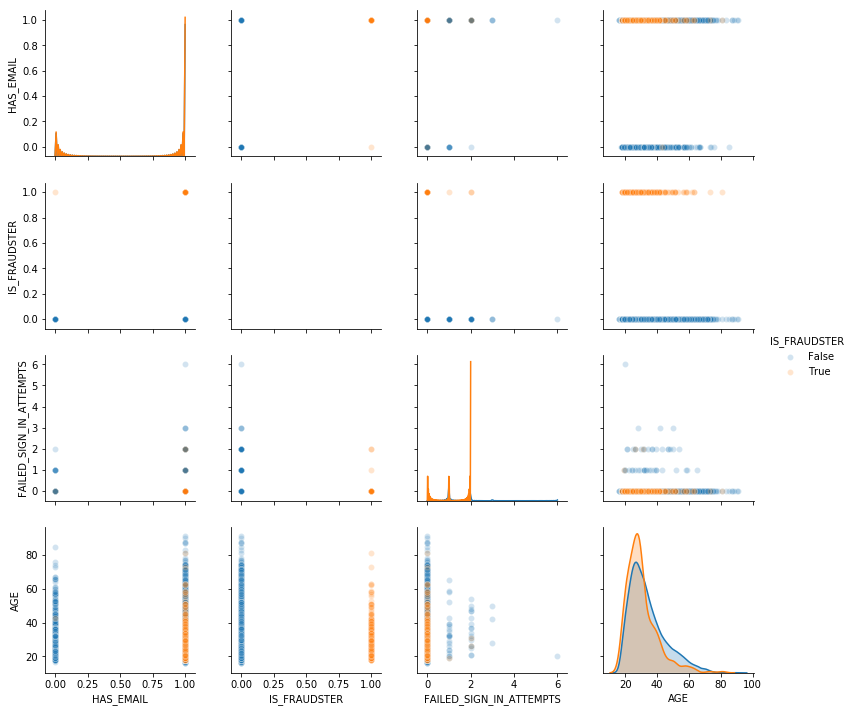

In [32]:
g=sns.pairplot(data=user_df,plot_kws={'alpha':0.2},hue='IS_FRAUDSTER');
g.fig.set_size_inches(12,10)

There is one sign of fraudster in the user-dataset that fraudsters have two attempts to sign in maximum. They were probably worried about getting caught.

In [33]:
user_df[user_df['IS_FRAUDSTER']==True]['FAILED_SIGN_IN_ATTEMPTS'].value_counts()

0    295
2      2
1      1
Name: FAILED_SIGN_IN_ATTEMPTS, dtype: int64

In [34]:
user_df[user_df['IS_FRAUDSTER']==False]['FAILED_SIGN_IN_ATTEMPTS'].value_counts()

0    9600
1      24
2      18
3       3
6       1
Name: FAILED_SIGN_IN_ATTEMPTS, dtype: int64

So my preliminary observations for fraudsters are:

*  if country of merchant differ from country/phone_country of user
*  if currency of transaction differ from country of user
*  if period on platform is very small
*  if period between transactions is too small
*  if count of transactions is not common for this user
*  or MERCHANT_CATEGORY is not common for this user
*  or TYPE is not common for this user

*  new ideas: several bank transfers or single ATM-operation lead to LOCK
*  NAN merchant country lead to ALERT and LOCK
*  entry-method == man lead to ALERT

### Feature Engineering
  - Utilizing your findings from part a) and some creativity, create some features. Explain your reasoning behind the features.
  - Make a features.py script which when executed will create these features and store them in the DB. 

#### Now look at transactions.

In [35]:
trn_df.head()

,CURRENCY,AMOUNT,STATE,CREATED_DATE,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,ID
0,GBP,175,COMPLETED,2017-12-20 12:46:20.294,cafe,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,b3332e6f-7865-4d6e-b6a5-370bc75568d8
1,EUR,2593,COMPLETED,2017-12-20 12:38:47.232,bar,AUS,cont,ed773c34-2b83-4f70-a691-6a7aa1cb9f11,CARD_PAYMENT,GAIA,853d9ff8-a007-40ef-91a2-7d81e29a309a
2,EUR,1077,COMPLETED,2017-12-20 12:34:39.668,NaN,CZE,cont,eb349cc1-e986-4bf4-bb75-72280a7b8680,CARD_PAYMENT,GAIA,04de8238-7828-4e46-91f1-050a9aa7a9df
3,GBP,198,COMPLETED,2017-12-20 12:45:50.555,supermarket,GBR,cont,dc78fbc4-c936-45d3-a813-e2477ac6d74b,CARD_PAYMENT,GAIA,2b790b9b-c312-4098-a4b3-4830fc8cda53
4,EUR,990,COMPLETED,2017-12-20 12:45:32.722,NaN,FRA,cont,32958a5c-2532-42f7-94f9-127f2a812a55,CARD_PAYMENT,GAIA,6469fc3a-e535-41e9-91b9-acb46d1cc65d


In [36]:
# look at the fraudster
trn_df[trn_df['USER_ID']=='fb23710b-609a-49bf-8a9a-be49c59ce6de'].sort_values('CREATED_DATE', ascending=True)

,CURRENCY,AMOUNT,STATE,CREATED_DATE,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,ID
132324,GBP,5000,COMPLETED,2018-04-06 18:43:33.955,NaN,NaN,misc,fb23710b-609a-49bf-8a9a-be49c59ce6de,TOPUP,MINOS,961f9451-2d7d-4c62-8593-bf44d15d38b0
132344,GBP,4709,COMPLETED,2018-04-06 18:53:35.634,point_of_interest,LTU,manu,fb23710b-609a-49bf-8a9a-be49c59ce6de,CARD_PAYMENT,GAIA,953623dd-4d61-4f1a-b760-13fda4217b3b
142701,GBP,6500,COMPLETED,2018-04-09 14:53:30.372,NaN,NaN,misc,fb23710b-609a-49bf-8a9a-be49c59ce6de,TOPUP,MINOS,eb2c9e9d-bffc-4347-9d86-28b6f0dea32d
142924,GBP,6000,COMPLETED,2018-04-09 17:23:08.928,NaN,NaN,misc,fb23710b-609a-49bf-8a9a-be49c59ce6de,P2P,INTERNAL,823e2403-eee1-4c74-beae-c53fdffdaae0


In [37]:
df = trn_df.drop('ID', axis=1).merge(user_df, left_on="USER_ID", right_on="ID").drop(['ID'],axis=1)
print(df.shape)
df.head()

(638742, 19)


,CURRENCY,AMOUNT,STATE,CREATED_DATE_x,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,CREATED_DATE_y,COUNTRY,KYC,FAILED_SIGN_IN_ATTEMPTS,AGE
0,GBP,175,COMPLETED,2017-12-20 12:46:20.294,cafe,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,False,2018-05-25,2017-09-28 11:53:55.810000,GB,PASSED,0,55
1,GBP,175,COMPLETED,2017-12-19 12:40:55.325,cafe,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,False,2018-05-25,2017-09-28 11:53:55.810000,GB,PASSED,0,55
2,GBP,220,COMPLETED,2017-12-19 12:45:05.706,department_store,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,False,2018-05-25,2017-09-28 11:53:55.810000,GB,PASSED,0,55
3,GBP,210,COMPLETED,2017-12-21 07:42:25.629,NaN,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,False,2018-05-25,2017-09-28 11:53:55.810000,GB,PASSED,0,55
4,GBP,485,COMPLETED,2017-12-21 08:36:56.132,cafe,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,False,2018-05-25,2017-09-28 11:53:55.810000,GB,PASSED,0,55


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638742 entries, 0 to 638741
Data columns (total 19 columns):
CURRENCY                   638742 non-null object
AMOUNT                     638742 non-null int64
STATE                      638742 non-null object
CREATED_DATE_x             638742 non-null object
MERCHANT_CATEGORY          208677 non-null object
MERCHANT_COUNTRY           447017 non-null object
ENTRY_METHOD               638742 non-null object
USER_ID                    638742 non-null object
TYPE                       638742 non-null object
SOURCE                     638742 non-null object
HAS_EMAIL                  638742 non-null int64
PHONE_COUNTRY              638742 non-null object
IS_FRAUDSTER               638742 non-null bool
TERMS_VERSION              638742 non-null object
CREATED_DATE_y             638742 non-null object
COUNTRY                    638742 non-null object
KYC                        638742 non-null object
FAILED_SIGN_IN_ATTEMPTS    638742 non-null 

In [39]:
# Replace NaN to 'Undefined' in MERCHANT_CATEGORY and MERCHANT_COUNTRY
df = df.fillna('Undefined')

In [40]:
# Create AGE variable as age on CREATED_DATE date of profile in system
df['PROFILE_AGE'] = df.apply(lambda x: (datetime.strptime(x['CREATED_DATE_x']+('000' if '.' in x['CREATED_DATE_x'] else '.000000'), '%Y-%m-%d %H:%M:%S.%f')-datetime.strptime(x['CREATED_DATE_y'], '%Y-%m-%d %H:%M:%S.%f')).days, axis=1)

In [41]:
df['CREATED_DATE_x'] = df['CREATED_DATE_x'].apply(lambda x: (datetime.strptime(x+('000' if '.' in x else '.000000'), '%Y-%m-%d %H:%M:%S.%f').strftime("%Y-%m-%d %H:%M:%S")))

In [42]:
# No needs of CREATED_DATE_y anymore, drop them
df.drop(['CREATED_DATE_y'], axis=1, inplace=True)

In [43]:
# Transform boolean variable IS_FRAUDSTER to binary
df['IS_FRAUDSTER'] = df['IS_FRAUDSTER'].astype(int)

In [44]:
print(df.info())
print(df.describe().T)
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638742 entries, 0 to 638741
Data columns (total 19 columns):
CURRENCY                   638742 non-null object
AMOUNT                     638742 non-null int64
STATE                      638742 non-null object
CREATED_DATE_x             638742 non-null object
MERCHANT_CATEGORY          638742 non-null object
MERCHANT_COUNTRY           638742 non-null object
ENTRY_METHOD               638742 non-null object
USER_ID                    638742 non-null object
TYPE                       638742 non-null object
SOURCE                     638742 non-null object
HAS_EMAIL                  638742 non-null int64
PHONE_COUNTRY              638742 non-null object
IS_FRAUDSTER               638742 non-null int64
TERMS_VERSION              638742 non-null object
COUNTRY                    638742 non-null object
KYC                        638742 non-null object
FAILED_SIGN_IN_ATTEMPTS    638742 non-null int64
AGE                        638742 non-null 

,CURRENCY,AMOUNT,STATE,CREATED_DATE_x,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,COUNTRY,KYC,FAILED_SIGN_IN_ATTEMPTS,AGE,PROFILE_AGE
0,GBP,175,COMPLETED,2017-12-20 12:46:20,cafe,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,0,2018-05-25,GB,PASSED,0,55,83
1,GBP,175,COMPLETED,2017-12-19 12:40:55,cafe,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,0,2018-05-25,GB,PASSED,0,55,82
2,GBP,220,COMPLETED,2017-12-19 12:45:05,department_store,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,0,2018-05-25,GB,PASSED,0,55,82
3,GBP,210,COMPLETED,2017-12-21 07:42:25,Undefined,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,0,2018-05-25,GB,PASSED,0,55,83
4,GBP,485,COMPLETED,2017-12-21 08:36:56,cafe,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,0,2018-05-25,GB,PASSED,0,55,83


### Let's transform countries to CODE3 format

In [45]:
df['COUNTRY'] = df['COUNTRY'].map({c[0]: c[1] for c in cntr_df[['CODE','CODE3']].values})

In [46]:
# We have numeric values of MERCHANT_COUNTRY!
df['MERCHANT_COUNTRY'].value_counts()

Undefined    191725
GBR          136448
USA           42723
FRA           27673
LTU           25040
IRL           23653
ESP           20976
NLD           17173
POL            9365
ITA            9054
AUS            8867
DEU            8149
LUX            7045
CAN            5566
NZL            4802
CHE            4523
PRT            4513
GRC            4270
HUN            4007
LVA            3664
SWE            3541
EST            3490
ZAF            3230
THA            2877
NOR            2864
DNK            2689
CYP            2421
IDN            2289
ROM            2285
CZE            2254
              ...  
DZA               1
POM               1
660               1
VEN               1
033               1
417               1
KIO               1
16I               1
W71               1
415               1
NTB               1
482               1
062               1
112               1
DJI               1
185               1
140               1
510               1
CAU               1


In [47]:
# Test single example of numeric country code
cntr_df[cntr_df['PHONECODE']==386]

,CODE,NAME,CODE3,NUMCODE,PHONECODE
182,SI,Slovenia,sVN,705,386


In [48]:
# Trying to replace country code to CODE3
df['MERCHANT_COUNTRY'] = df['MERCHANT_COUNTRY'].apply(lambda x: (cntr_df[cntr_df['NUMCODE']==int(x)]['CODE3'].values[0] if len(cntr_df[cntr_df['NUMCODE']==int(x)]['CODE3'].values)>0 else x) if x.isdigit() else x)
df[[x.isdigit() for x in df['MERCHANT_COUNTRY'].values]].head()

,CURRENCY,AMOUNT,STATE,CREATED_DATE_x,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,COUNTRY,KYC,FAILED_SIGN_IN_ATTEMPTS,AGE,PROFILE_AGE
3463,EUR,10000,COMPLETED,2016-10-30 11:17:01,Undefined,386,chip,c069a845-b843-475e-af4f-a27e379f1c76,ATM,GAIA,1,GB||JE||IM||GG,0,2018-03-20,gBR,PASSED,0,49,234
3464,EUR,9000,COMPLETED,2016-10-28 10:30:21,Undefined,386,chip,c069a845-b843-475e-af4f-a27e379f1c76,ATM,GAIA,1,GB||JE||IM||GG,0,2018-03-20,gBR,PASSED,0,49,232
3480,EUR,6000,COMPLETED,2016-10-29 16:02:05,Undefined,386,chip,c069a845-b843-475e-af4f-a27e379f1c76,ATM,GAIA,1,GB||JE||IM||GG,0,2018-03-20,gBR,PASSED,0,49,234
9134,GBP,996,COMPLETED,2016-09-29 14:40:00,Undefined,000,manu,714661e3-b09b-42ef-a7b8-14a90bd455f5,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,0,2018-05-25,gBR,PASSED,0,42,75
9157,GBP,1068,COMPLETED,2016-10-29 16:15:53,Undefined,000,manu,714661e3-b09b-42ef-a7b8-14a90bd455f5,CARD_PAYMENT,GAIA,1,GB||JE||IM||GG,0,2018-05-25,gBR,PASSED,0,42,105


In [49]:
# Trying to replace country code to CODE3
# Add "C" to the missing countries
df['MERCHANT_COUNTRY'] = df['MERCHANT_COUNTRY'].apply(lambda x: (cntr_df[cntr_df['PHONECODE']==int(x)]['CODE3'].values[0] if len(cntr_df[cntr_df['PHONECODE']==int(x)]['CODE3'].values)>0 else 'C'+x) if x.isdigit() else x)
df[[x.isdigit() for x in df['MERCHANT_COUNTRY'].values]].head()

,CURRENCY,AMOUNT,STATE,CREATED_DATE_x,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,COUNTRY,KYC,FAILED_SIGN_IN_ATTEMPTS,AGE,PROFILE_AGE


In [50]:
# Fill NaN to Undefined and create binary variable HOMELAND to identify than transaction is made in country of user
df['COUNTRY'] = df['COUNTRY'].fillna('Undefined')
df['HOMELAND'] = df.apply(lambda x: 1 if x['COUNTRY'].upper() == x['MERCHANT_COUNTRY'].upper() else 0, axis=1)

#### Let's create some periods and statistics

In [51]:
# Functions to calculate day and hour of transactions of users
def transaction_by_day_count(dataset):
    dataset['DAY_OF_TRANSACTION'] = dataset['CREATED_DATE_x'].apply(
        lambda x: int((datetime.strptime(x, '%Y-%m-%d %H:%M:%S')).strftime('%w'))
    ) 
    tmp_df = dataset.groupby(
        ['USER_ID','DAY_OF_TRANSACTION']
    )['DAY_OF_TRANSACTION'].size().unstack().fillna(0).reset_index()
    old_columns = [
        old_col for old_col in tmp_df.columns.tolist()
        if old_col in dataset['DAY_OF_TRANSACTION'].unique()
    ]
    tmp_df.rename(
        columns={old_col: 'DAY_' + str(old_col) for old_col in old_columns},
        inplace=True
    )
    return tmp_df

def transaction_by_hour_count(dataset):
    dataset['HOUR_OF_TRANSACTION'] = dataset['CREATED_DATE_x'].apply(
        lambda x: int((datetime.strptime(x, '%Y-%m-%d %H:%M:%S')).strftime('%H'))
    ) 
    tmp_df = dataset.groupby(
        ['USER_ID','HOUR_OF_TRANSACTION']
    )['HOUR_OF_TRANSACTION'].size().unstack().fillna(0).reset_index()
    old_columns = [
        old_col for old_col in tmp_df.columns.tolist()
        if old_col in dataset['HOUR_OF_TRANSACTION'].unique()
    ]
    tmp_df.rename(
        columns={old_col: 'H_' + str(old_col) for old_col in old_columns},
        inplace=True
    )
    return tmp_df

In [52]:
transaction_by_day = transaction_by_day_count(df)
transaction_by_day = transaction_by_day.set_index('USER_ID')

transaction_by_hour = transaction_by_hour_count(df)
transaction_by_hour = transaction_by_hour.set_index('USER_ID')

/home/truename/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # This is added back by InteractiveShellApp.init_path()
/home/truename/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [53]:
transaction_by_hour.head()

HOUR_OF_TRANSACTION,H_0,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,...,H_14,H_15,H_16,H_17,H_18,H_19,H_20,H_21,H_22,H_23
USER_ID,,,,,,,,,,,,,,,,,,,,,
000e88bb-d302-4fdc-b757-2b1a2c33e7d6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0
001032e0-8071-4baf-95b9-e50214665c2e,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0,2.0,...,4.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,1.0,0.0
00131af8-66f0-4526-8b5f-dc2fdb26c7d7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
001926be-3245-43fa-86dd-b40ee160b6f9,0.0,0.0,0.0,1.0,0.0,0.0,4.0,12.0,14.0,17.0,...,25.0,25.0,11.0,6.0,16.0,6.0,4.0,2.0,0.0,0.0
001cc034-5730-47c6-a70c-25f42249c9ee,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# Join datasets
df_time = pd.merge(
    transaction_by_day,
    transaction_by_hour,
    left_index=True,
    right_index=True,)

In [55]:
df_time = df_time.reset_index()

In [56]:
# we will store time-features separetely from main dataset to minimize space on disk and database
df_time.to_csv('../data/dataset_time.csv')
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7748 entries, 0 to 7747
Data columns (total 32 columns):
USER_ID    7748 non-null object
DAY_0      7748 non-null float64
DAY_1      7748 non-null float64
DAY_2      7748 non-null float64
DAY_3      7748 non-null float64
DAY_4      7748 non-null float64
DAY_5      7748 non-null float64
DAY_6      7748 non-null float64
H_0        7748 non-null float64
H_1        7748 non-null float64
H_2        7748 non-null float64
H_3        7748 non-null float64
H_4        7748 non-null float64
H_5        7748 non-null float64
H_6        7748 non-null float64
H_7        7748 non-null float64
H_8        7748 non-null float64
H_9        7748 non-null float64
H_10       7748 non-null float64
H_11       7748 non-null float64
H_12       7748 non-null float64
H_13       7748 non-null float64
H_14       7748 non-null float64
H_15       7748 non-null float64
H_16       7748 non-null float64
H_17       7748 non-null float64
H_18       7748 non-null float64
H_1

#### Let's transform currency

In [57]:
df = pd.merge(df, cur_df, left_on="CURRENCY", right_on="CCY")
df['IS_CRYPTO'] = df['IS_CRYPTO'].astype(int)
df['AMOUNT'] = df['AMOUNT'] * 10**df['EXPONENT']

In [58]:
df.columns

Index(['CURRENCY', 'AMOUNT', 'STATE', 'CREATED_DATE_x', 'MERCHANT_CATEGORY',
       'MERCHANT_COUNTRY', 'ENTRY_METHOD', 'USER_ID', 'TYPE', 'SOURCE',
       'HAS_EMAIL', 'PHONE_COUNTRY', 'IS_FRAUDSTER', 'TERMS_VERSION',
       'COUNTRY', 'KYC', 'FAILED_SIGN_IN_ATTEMPTS', 'AGE', 'PROFILE_AGE',
       'HOMELAND', 'DAY_OF_TRANSACTION', 'HOUR_OF_TRANSACTION', 'CCY',
       'EXPONENT', 'IS_CRYPTO'],
      dtype='object')

In [59]:
cols_to_select = ['USER_ID', 'AMOUNT',
       'STATE', 'MERCHANT_CATEGORY', 'ENTRY_METHOD', 'TYPE', 'SOURCE', 'HAS_EMAIL', 
       'IS_FRAUDSTER', 'TERMS_VERSION', 'KYC', 'FAILED_SIGN_IN_ATTEMPTS', 'AGE', 'PROFILE_AGE', 'HOMELAND',
       'DAY_OF_TRANSACTION', 'HOUR_OF_TRANSACTION', 'IS_CRYPTO']

In [60]:
df = df[cols_to_select]

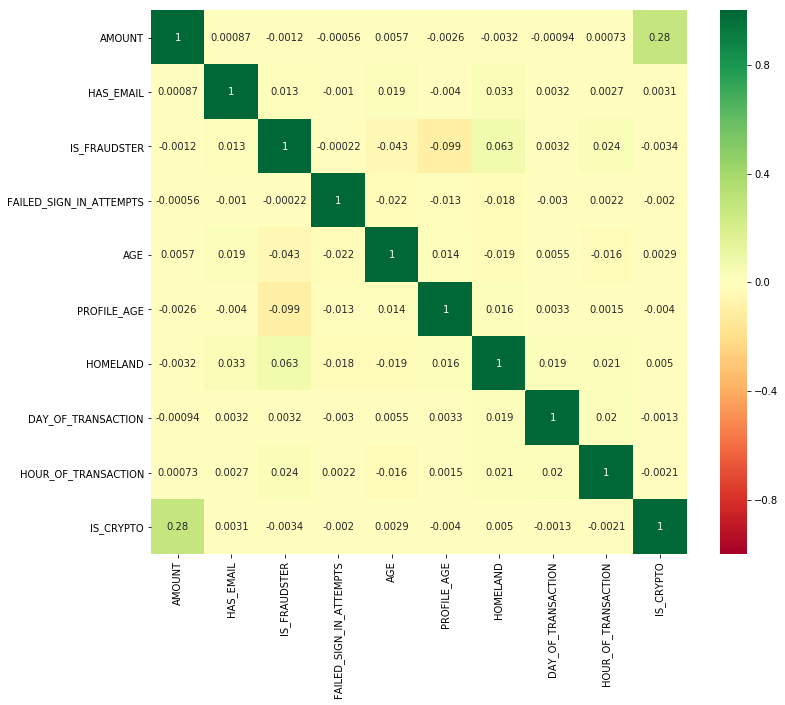

In [61]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn",vmin=-1,vmax=1);

In [62]:
df.head()

,USER_ID,AMOUNT,STATE,MERCHANT_CATEGORY,ENTRY_METHOD,TYPE,SOURCE,HAS_EMAIL,IS_FRAUDSTER,TERMS_VERSION,KYC,FAILED_SIGN_IN_ATTEMPTS,AGE,PROFILE_AGE,HOMELAND,DAY_OF_TRANSACTION,HOUR_OF_TRANSACTION,IS_CRYPTO
0,8f99c254-7cf2-4e35-b7e4-53804d42445d,17500,COMPLETED,cafe,cont,CARD_PAYMENT,GAIA,1,0,2018-05-25,PASSED,0,55,83,1,3,12,0
1,8f99c254-7cf2-4e35-b7e4-53804d42445d,17500,COMPLETED,cafe,cont,CARD_PAYMENT,GAIA,1,0,2018-05-25,PASSED,0,55,82,1,2,12,0
2,8f99c254-7cf2-4e35-b7e4-53804d42445d,22000,COMPLETED,department_store,cont,CARD_PAYMENT,GAIA,1,0,2018-05-25,PASSED,0,55,82,1,2,12,0
3,8f99c254-7cf2-4e35-b7e4-53804d42445d,21000,COMPLETED,Undefined,cont,CARD_PAYMENT,GAIA,1,0,2018-05-25,PASSED,0,55,83,1,4,7,0
4,8f99c254-7cf2-4e35-b7e4-53804d42445d,48500,COMPLETED,cafe,cont,CARD_PAYMENT,GAIA,1,0,2018-05-25,PASSED,0,55,83,1,4,8,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638742 entries, 0 to 638741
Data columns (total 18 columns):
USER_ID                    638742 non-null object
AMOUNT                     638742 non-null int64
STATE                      638742 non-null object
MERCHANT_CATEGORY          638742 non-null object
ENTRY_METHOD               638742 non-null object
TYPE                       638742 non-null object
SOURCE                     638742 non-null object
HAS_EMAIL                  638742 non-null int64
IS_FRAUDSTER               638742 non-null int64
TERMS_VERSION              638742 non-null object
KYC                        638742 non-null object
FAILED_SIGN_IN_ATTEMPTS    638742 non-null int64
AGE                        638742 non-null int64
PROFILE_AGE                638742 non-null int64
HOMELAND                   638742 non-null int64
DAY_OF_TRANSACTION         638742 non-null int64
HOUR_OF_TRANSACTION        638742 non-null int64
IS_CRYPTO                  638742 non-null int64

In [64]:
# store main dataset to the disk
df.to_csv('../data/dataset.csv')

In [65]:
import psycopg2 as pg
import yaml
from pathlib import Path
import os

In [66]:
def create_tables(config, connection):
    cur = connection.cursor()
    for table in config:
        name = table.get('name')
        schema = table.get('schema')
        ddl = f"""CREATE TABLE IF NOT EXISTS {name} ({schema})"""
        cur.execute(ddl)

    connection.commit()
    cur.close()

def transform_tables(config):

    data_path = "../data/"

    for table in config:
        table_name = table.get('name')
        table_source = os.path.join(data_path,f"{table_name}.csv")
        table_cols = []
        for i in table.get('columns'):
            table_cols.append(str.upper(i))
        df = pd.read_csv(table_source)
        df_reorder = df[table_cols]  # rearrange column here
        df_reorder.to_csv(table_source, index=False)

def load_tables(config, connection):

    # iterate and load
    cur = connection.cursor()
    data_path = "../data/"

    for table in config:
        table_name = table.get('name')
        table_source = os.path.join(data_path,f"{table_name}.csv")
        with open(table_source, 'r') as f:
            next(f)
            cur.copy_expert(f"COPY {table_name} FROM STDIN CSV NULL AS ''", f)
        connection.commit()
    cur.close()

In [67]:
connection = pg.connect(
    host='localhost',
    port=54320,
    dbname='ht_db',
    user='postgres'
)

In [68]:
with open("../misc/schemas_features.yaml") as schema_file:
    config = yaml.load(schema_file)
create_tables(config, connection)
transform_tables(config)
load_tables(config, connection)

In [69]:
connection.close()

Look at the python script with all features-engineering' steps

In [70]:
!cat ../code/features.py

# create features and store them in the DB

import psycopg2 as pg
import yaml
from pathlib import Path
import os
import pandas as pd
from datetime import datetime
import dateutil


def prepare_user_features(users_file_name):
    user_df = pd.read_csv(users_file_name)
    # There are NaN in TERMS_VERSION - fill it by "Undefined" version
    user_df['TERMS_VERSION'] = user_df['TERMS_VERSION'].fillna("Undefined")
    user_df.drop('STATE', axis=1, inplace=True)
    # Create AGE variable as age on CREATED_DATE date of profile in system
    user_df['AGE'] = user_df.apply(lambda x: datetime.strptime(x['CREATED_DATE'], '%Y-%m-%d %H:%M:%S.%f').year-x['BIRTH_YEAR'], axis=1)
    # We don't need BIRTH_YEAR anymore - drop it
    user_df.drop('BIRTH_YEAR', axis=1, inplace=True)
    return user_df


def prepare_transactions_features(user_df, transactions_file_name):
    trn_df = pd.read_csv(transactions_file_name)
    df = trn_df.drop('ID', axis=1).merge(user_df, left_on="USER_ID", right_on="ID").dro

In [71]:
#!python ../code/features.py

### Model Selection/Validation
        i) Create an ML model which identifies fraudsters. Assess the quality of your model and explain.
        ii) Make a train.py file which generates the fitted model artifact (it should be stored under the artifacts sub-directory).

We've prepared dataset and dataset_time files and store them to the DB.

We could split task to two:
*  Solve binary classification: fraudster or not
*  Use the probabilities of binary classifier or solve multiclass classification problem with classes: 'PASS', 'LOCK_USER', 'ALERT_AGENT', 'LOCK_USER+ALERT_AGENT'

Let's solve just binary classification problem

In [72]:
import numpy as np
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import dateutil

%matplotlib inline
from scipy.stats import pearsonr
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel

In [73]:
dataset_file_name = '../data/dataset.csv'
dataset_time_file_name = '../data/dataset_time.csv'

# We don't need CURRENCY as a feature because FRAUDSTER is not identified by CURRENCY
df = pd.read_csv(dataset_file_name)
df_time = pd.read_csv(dataset_time_file_name)

In [74]:
df[df['IS_FRAUDSTER']==1].head()

,USER_ID,AMOUNT,STATE,MERCHANT_CATEGORY,ENTRY_METHOD,TYPE,SOURCE,HAS_EMAIL,IS_FRAUDSTER,TERMS_VERSION,KYC,FAILED_SIGN_IN_ATTEMPTS,AGE,PROFILE_AGE,HOMELAND,DAY_OF_TRANSACTION,HOUR_OF_TRANSACTION,IS_CRYPTO
28586,3c65dee2-6496-4f8b-8efc-efc73b315129,3000000,COMPLETED,Undefined,misc,TOPUP,MINOS,1,1,2018-03-20,PASSED,0,36,24,0,3,15,0
28587,3c65dee2-6496-4f8b-8efc-efc73b315129,28000,COMPLETED,convenience_store,cont,CARD_PAYMENT,GAIA,1,1,2018-03-20,PASSED,0,36,24,1,3,16,0
28588,3c65dee2-6496-4f8b-8efc-efc73b315129,10500000,COMPLETED,Undefined,misc,BANK_TRANSFER,MINOS,1,1,2018-03-20,PASSED,0,36,23,0,2,21,0
28589,3c65dee2-6496-4f8b-8efc-efc73b315129,300000,DECLINED,Undefined,chip,ATM,GAIA,1,1,2018-03-20,PASSED,0,36,25,1,4,13,0
28590,3c65dee2-6496-4f8b-8efc-efc73b315129,3000000,COMPLETED,Undefined,misc,TOPUP,MINOS,1,1,2018-03-20,PASSED,0,36,25,0,4,21,0


In [75]:
# Let's create dummy columns for categorical variables
df = pd.get_dummies(df, columns=['ENTRY_METHOD','TYPE','SOURCE','STATE','MERCHANT_CATEGORY','TERMS_VERSION','KYC'])
# and collect final dataset with time-features from dataset_time
df = df.merge(df_time, left_on="USER_ID", right_on="USER_ID").drop('USER_ID',axis=1)
del df_time

In [76]:
print(df.shape)
df.head()

(638742, 198)


,AMOUNT,HAS_EMAIL,IS_FRAUDSTER,FAILED_SIGN_IN_ATTEMPTS,AGE,PROFILE_AGE,HOMELAND,DAY_OF_TRANSACTION,HOUR_OF_TRANSACTION,IS_CRYPTO,...,H_14,H_15,H_16,H_17,H_18,H_19,H_20,H_21,H_22,H_23
0,17500,1,0,0,55,83,1,3,12,0,...,9.0,9.0,14.0,15.0,18.0,19.0,9.0,1.0,1.0,3.0
1,17500,1,0,0,55,82,1,2,12,0,...,9.0,9.0,14.0,15.0,18.0,19.0,9.0,1.0,1.0,3.0
2,22000,1,0,0,55,82,1,2,12,0,...,9.0,9.0,14.0,15.0,18.0,19.0,9.0,1.0,1.0,3.0
3,21000,1,0,0,55,83,1,4,7,0,...,9.0,9.0,14.0,15.0,18.0,19.0,9.0,1.0,1.0,3.0
4,48500,1,0,0,55,83,1,4,8,0,...,9.0,9.0,14.0,15.0,18.0,19.0,9.0,1.0,1.0,3.0


In [77]:
# We'll use K-fold
N_FOLDS = 3
RANDOM_STATE = 7

In [78]:
# split dataset to features and predicted value
X, y = df.drop('IS_FRAUDSTER',axis=1), df['IS_FRAUDSTER']

In [79]:
# Classes are very unbalanced
df['IS_FRAUDSTER'].value_counts()

0    624828
1     13914
Name: IS_FRAUDSTER, dtype: int64

In [80]:
# balancing classes
classes_count = y.value_counts()
max_class_count = classes_count.max()

X_over = X.copy()
y_over = y.copy()

for cls in zip(classes_count,classes_count.index):
    if cls[0] != max_class_count:
        idx = np.random.choice(y[y==cls[1]].index,size = max_class_count-cls[0])
        X_add = X.iloc[idx]
        y_add = y.iloc[idx]
        X_over = X_over.append(X_add)
        y_over = y_over.append(y_add)

del X,y
y_over.value_counts()

1    624828
0    624828
Name: IS_FRAUDSTER, dtype: int64

In [81]:
# split to train and test datasets
X_train_over,X_test_over,y_train_over,y_test_over = train_test_split(X_over,y_over,test_size=.2, random_state=RANDOM_STATE)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=-1, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)


/home/truename/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score on train by 3 folds : 0.9932781383263937
Score on test : 0.9999759934702239
Test Accuracy  : 0.99998
Test F1-score  : 0.99998
Test Precision : 0.99998
Test Recall    : 0.99998


/home/truename/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


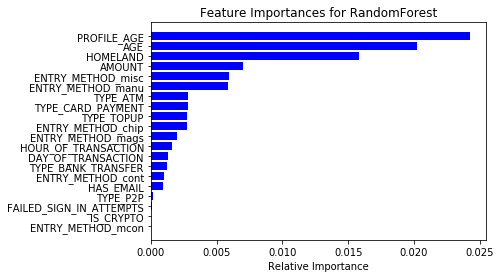

In [82]:
# train simple randomforest with KFold
rf = RandomForestClassifier(n_jobs=-1,random_state=RANDOM_STATE)
print(rf)

score_on_train = 0
for trn_idx,tst_idx in KFold(n_splits=N_FOLDS,random_state=RANDOM_STATE).split(X_train_over,y_train_over):
    X_train_fold,y_train_fold = X_over.iloc[trn_idx],y_over.iloc[trn_idx]
    X_test_fold,y_test_fold = X_over.iloc[tst_idx],y_over.iloc[tst_idx]
    rf.fit(X_train_fold,y_train_fold)
    score_on_train += rf.score(X_test_fold,y_test_fold)

rf.fit(X_train_over,y_train_over)
print(f'Score on train by {N_FOLDS} folds : {score_on_train/N_FOLDS}')
print(f'Score on test : {rf.score(X_test_over,y_test_over)}')

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
rf_pred = rf.predict(X_test_over)
print (f"Test Accuracy  : {accuracy_score(y_test_over,rf_pred):.5f}")
print (f"Test F1-score  : {f1_score(y_test_over,rf_pred,average='macro'):.5f}")
print (f"Test Precision : {precision_score(y_test_over,rf_pred,average='macro'):.5f}")
print (f"Test Recall    : {recall_score(y_test_over,rf_pred,average='macro'):.5f}")

# store list of features to the model parameter
rf.feature_names = list(X_train_over.columns.values)
# save model to artifact
from sklearn.externals import joblib
joblib.dump(rf, '../artifacts/model.pkl') 
#rf = joblib.load('../artifacts/model.pkl')

# Let's look at features importance
features = X_train_over.columns
importances = rf.feature_importances_[0:20]
indices = np.argsort(importances)

plt.title('Feature Importances for RandomForest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
del rf

Because of min_samples_leaf=1 we might think that classifier has been overfitting on train dataset. But TEST accuracy and F1-score are very good for RandomForest only with 10 trees.

In [83]:
# Because of out of memory on grid with all features we'll leave only top-20 features from list of features importances
X_train_over = X_train_over[[features[i] for i in indices]]
X_test_over = X_test_over[[features[i] for i in indices]]

Let's do the grid search of parameters for randomforest

In [ ]:
%%time
params = {'n_estimators':[10,20],
          'max_depth':[5,10,20],
          'min_samples_leaf':[1,5,10],
          'random_state':[RANDOM_STATE],
          'n_jobs':[-1]}

rf_grid = GridSearchCV(RandomForestClassifier(),param_grid=params,verbose=0,n_jobs=-1,cv=N_FOLDS)
rf_grid.fit(X_train_over,y_train_over)
print(rf_grid.best_params_)

In [ ]:
rf_pred = rf_grid.predict(X_test_over)
print (f"Test Accuracy  : {accuracy_score(y_test_over,rf_pred):.5f}")
print (f"Test F1-score  : {f1_score(y_test_over,rf_pred,average='macro'):.5f}")
print (f"Test Precision : {precision_score(y_test_over,rf_pred,average='macro'):.5f}")
print (f"Test Recall    : {recall_score(y_test_over,rf_pred,average='macro'):.5f}")

Because of limited feature's number we have no improvements after gridsearch.

Let's try PCA to minimize number of features for model.

In [ ]:
for t in [5,10,20]:
    X_pca = pd.DataFrame(PCA(n_components=round(len(X_over.columns)/t)).fit_transform(X_over))

    # split to train and test datasets
    X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(X_over,y_over,test_size=.2, random_state=RANDOM_STATE)
    rf_pca = RandomForestClassifier(n_jobs=-1,random_state=RANDOM_STATE)

    score_on_train = 0
    for trn_idx,tst_idx in KFold(n_splits=N_FOLDS,random_state=RANDOM_STATE).split(X_train_pca,y_train_pca):
        X_train_fold,y_train_fold = X_pca.iloc[trn_idx],y_over.iloc[trn_idx]
        X_test_fold,y_test_fold = X_pca.iloc[tst_idx],y_over.iloc[tst_idx]
        rf_pca.fit(X_train_fold,y_train_fold)
        score_on_train += rf_pca.score(X_test_fold,y_test_fold)

    rf_pca.fit(X_train_pca,y_train_pca)
    print(f'Components={round(len(X_over.columns)/t)}; Score on train by {N_FOLDS} folds : {score_on_train/N_FOLDS}')
    print(f'Components={round(len(X_over.columns)/t)}; Score on test : {rf_pca.score(X_test_pca,y_test_pca)}')

/home/truename/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Components=39; Score on train by 3 folds : 0.9949956138180367
Components=39; Score on test : 0.9999759934702239


We can see that there is no much improvement with PCA.

## Operationalization
    i) How will you utilize this model to catch fraudsters? If a fraudster is identified, what should be the resulting action: LOCK_USER, ALERT_AGENT, or BOTH? Explain.
    ii) Make a patrol.py file and write a simple function which implements your logic from above. The function should accept a user_id and yield the suggested action(s) (e.g. patrol(user_id) = [‘LOCK_USER’, ‘ALERT_AGENT’])

In binary classification we could use predict-proba to predict percent of probability that this is Fraudster. I think it'd be usefull to operate with three level of attention:
*  If percent is more than first level (50% for example) we need ALERT.
*  If percent is more than second level (75% for example) we need LOCK and ALERT.
*  If percent is more than max level (90% for example) we need LOCK.

In [87]:
# load our pretrained model
from sklearn.externals import joblib
rf = joblib.load('../artifacts/model.pkl')

In [88]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [89]:
# we can load trained features from the model parameter
rf.feature_names

['AMOUNT',
 'HAS_EMAIL',
 'FAILED_SIGN_IN_ATTEMPTS',
 'AGE',
 'PROFILE_AGE',
 'HOMELAND',
 'DAY_OF_TRANSACTION',
 'HOUR_OF_TRANSACTION',
 'IS_CRYPTO',
 'ENTRY_METHOD_chip',
 'ENTRY_METHOD_cont',
 'ENTRY_METHOD_mags',
 'ENTRY_METHOD_manu',
 'ENTRY_METHOD_mcon',
 'ENTRY_METHOD_misc',
 'TYPE_ATM',
 'TYPE_BANK_TRANSFER',
 'TYPE_CARD_PAYMENT',
 'TYPE_P2P',
 'TYPE_TOPUP',
 'SOURCE_APOLLO',
 'SOURCE_BRIZO',
 'SOURCE_CRONUS',
 'SOURCE_GAIA',
 'SOURCE_HERA',
 'SOURCE_INTERNAL',
 'SOURCE_LETO',
 'SOURCE_LIMOS',
 'SOURCE_MINOS',
 'SOURCE_NYX',
 'SOURCE_OPHION',
 'STATE_CANCELLED',
 'STATE_COMPLETED',
 'STATE_DECLINED',
 'STATE_FAILED',
 'STATE_PENDING',
 'STATE_RECORDED',
 'STATE_REVERTED',
 'MERCHANT_CATEGORY_Undefined',
 'MERCHANT_CATEGORY_accounting',
 'MERCHANT_CATEGORY_administrative_area_level_1',
 'MERCHANT_CATEGORY_administrative_area_level_2',
 'MERCHANT_CATEGORY_administrative_area_level_3',
 'MERCHANT_CATEGORY_administrative_area_level_4',
 'MERCHANT_CATEGORY_airport',
 'MERCHANT_CATEG

In [90]:
# Let's look at the fraudsters
user_df = pd.read_csv('../data/users.csv')
user_df[user_df['IS_FRAUDSTER']==True].head()

,ID,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,CREATED_DATE,STATE,COUNTRY,BIRTH_YEAR,KYC,FAILED_SIGN_IN_ATTEMPTS
8166,5270b0f4-2e4a-4ec9-8648-2135312ac1c4,1,GB||JE||IM||GG,True,NaN,2017-09-19 01:55:22.376000,LOCKED,GB,1988,NONE,0
8167,848fc1b1-096c-40f7-b04a-1399c469e421,1,PL,True,2018-05-25,2018-06-16 15:55:43.800000,LOCKED,GB,1994,PASSED,0
8168,27c76eda-e159-4df3-845a-e13f4e28a8b5,1,GB||JE||IM||GG,True,2018-05-25,2018-05-11 18:20:45.608000,LOCKED,GB,1997,PASSED,0
8169,a27088ef-9452-403d-9bbb-f7b10180cdda,1,IN,True,2018-05-25,2018-05-18 16:41:12.267000,LOCKED,BE,1989,PASSED,0
8170,fb23710b-609a-49bf-8a9a-be49c59ce6de,1,LT,True,2018-03-20,2018-03-29 13:37:29.736000,LOCKED,LT,1992,PASSED,0


In [91]:
# Test prediction from full datasets from files
dataset_file_name = '../data/dataset.csv'
dataset_time_file_name = '../data/dataset_time.csv'

# load data from files
df = pd.read_csv(dataset_file_name)
df_time = pd.read_csv(dataset_time_file_name)

# Let's create dummy columns for categorical variables
df = pd.get_dummies(df, columns=['ENTRY_METHOD','TYPE','SOURCE','STATE','MERCHANT_CATEGORY','TERMS_VERSION','KYC'])
# and collect final dataset with time-features from dataset_time
df = df.merge(df_time, left_on="USER_ID", right_on="USER_ID")
del df_time

In [92]:
# Now check the fraudster's transactions
X = df[df['USER_ID']=='848fc1b1-096c-40f7-b04a-1399c469e421'].drop(['IS_FRAUDSTER','USER_ID'],axis=1)
y_pred = rf.predict_proba(X)[1]

In [93]:
rf.classes_, rf.predict_proba(X)

(array([0, 1]), array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

So we have to use second argument of predict_proba to get the probability of being fraudster.

In [94]:
# Now check another fraudster's transactions
X = df[df['USER_ID']=='fb23710b-609a-49bf-8a9a-be49c59ce6de'].drop(['IS_FRAUDSTER','USER_ID'],axis=1)
y_pred = rf.predict_proba(X)[:,1]
print(y_pred)

[1. 1. 1. 1.]


And model predicted that this is fraudster!

In [95]:
# look at not fraudsters
user_df[user_df['IS_FRAUDSTER']==False].head()

,ID,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,CREATED_DATE,STATE,COUNTRY,BIRTH_YEAR,KYC,FAILED_SIGN_IN_ATTEMPTS
0,1872820f-e3ac-4c02-bdc7-727897b60043,1,GB||JE||IM||GG,False,2018-05-25,2017-08-06 07:33:33.341000,ACTIVE,GB,1971,PASSED,0
1,545ff94d-66f8-4bea-b398-84425fb2301e,1,GB||JE||IM||GG,False,2018-01-01,2017-03-07 10:18:59.427000,ACTIVE,GB,1982,PASSED,0
2,10376f1a-a28a-4885-8daa-c8ca496026bb,1,ES,False,2018-09-20,2018-05-31 04:41:24.672000,ACTIVE,ES,1973,PASSED,0
3,fd308db7-0753-4377-879f-6ecf2af14e4f,1,FR,False,2018-05-25,2018-06-01 17:24:23.852000,ACTIVE,FR,1986,PASSED,0
4,755fe256-a34d-4853-b7ca-d9bb991a86d3,1,GB||JE||IM||GG,False,2018-09-20,2017-08-09 15:03:33.945000,ACTIVE,GB,1989,PASSED,0


In [96]:
# Now check not fraudster's transactions
X = df[df['USER_ID']=='1872820f-e3ac-4c02-bdc7-727897b60043'].drop(['IS_FRAUDSTER','USER_ID'],axis=1)
y_pred = rf.predict_proba(X)[:,1]
print(y_pred)

[0. 0. 0. 0. 0. 0.]


And model classifying this user as not a fraudster!

### Let's build production-mode function with reading from database

In [112]:
def get_user_data(user_id, model_features, cat_features):
    # Load data from DB for specific user_id, split cat_features to dummies and fill absented categorical features' values by zeros to create complete dataset with model_features
    
    import pandas as pd
    import psycopg2
    # Create connection to DB
    connection = psycopg2.connect(
        host='localhost',
        port=54320,
        dbname='ht_db',
        user='postgres',
    )
    # open cursor
    c = connection.cursor()
    # load dataset for specific user_id
    c.execute(f"SELECT * FROM dataset t1, dataset_time t2 where t1.USER_ID = t2.USER_ID and t1.USER_ID = '{user_id}';")
    # get all rows from opened cursor
    result = c.fetchall()
    # check that we have one or more rows
    assert len(result) > 0, f"We don't have data for user_id={user_id}!"
    # get column' names from cursor to create dataframe
    colnames = [desc[0].upper() for desc in c.description]
    # close cursor
    c.close()
    # create dataframe
    result = pd.DataFrame(result, columns = colnames)
    # split categorical features from dataset to dummies
    result = pd.get_dummies(result, columns = cat_features)
    # absented fields with categorical features' values fill with zeros and concat with loaded dataset to create complete dataset with model_features
    result = pd.concat([result,pd.DataFrame(0, index=np.arange(len(result)), columns=[x for x in model_features if x not in result.columns])], axis = 1)[model_features]
    # Close connection to DB
    connection.close()
    return result

In [121]:
#!python ../code/features.py

In [122]:
col_list = rf.feature_names
cat_features = ['ENTRY_METHOD','TYPE','SOURCE','STATE','MERCHANT_CATEGORY','TERMS_VERSION','KYC']

In [125]:
# Test fraudster user
X = get_user_data(user_id='fb23710b-609a-49bf-8a9a-be49c59ce6de', model_features = rf.feature_names, cat_features = cat_features)
X.head()

,AMOUNT,HAS_EMAIL,FAILED_SIGN_IN_ATTEMPTS,AGE,PROFILE_AGE,HOMELAND,DAY_OF_TRANSACTION,HOUR_OF_TRANSACTION,IS_CRYPTO,ENTRY_METHOD_chip,...,H_14,H_15,H_16,H_17,H_18,H_19,H_20,H_21,H_22,H_23
0,500000,1,0,26,8,0,5,18,0,0,...,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
1,470900,1,0,26,8,1,5,18,0,0,...,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,650000,1,0,26,11,0,1,14,0,0,...,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
3,600000,1,0,26,11,0,1,17,0,0,...,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
4,500000,1,0,26,8,0,5,18,0,0,...,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0


In [126]:
y_pred = rf.predict_proba(X)[:,1]
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 1.]


In [127]:
def check_alert(y_predicted):
    # Return the most important (heaviest by weight) flag as a result
    '''
    Rules:
        If percent is more than first level (50% for example) we need ALERT (weight=1) because it's suspicious transaction.
        If percent is more than second level (75% for example) we need LOCK and ALERT (weight=2) because it's very suspicious transaction and it's better to lock user and send alert signal to work with this user.
        If percent is more than max level (90% for example) we need LOCK (weight=3) because it's fraudster.
    '''
    
    # dictionary of alerts
    dict_of_alerts = {0: ['PASS'],
                      1: ['ALERT_AGENT'],
                      2: ['LOCK_USER', 'ALERT_AGENT'],
                      3: ['LOCK_USER']
                     }
    # for each prediction in y_prediction check the rules, get the max weight and apply dictionary to get the alert
    return dict_of_alerts[max([{       y >= .9: 3,
                                .75 <= y <  .9: 2,
                                .5  <= y < .75: 1,
                                       y <  .5: 0}[True] for y in y_predicted])]

In [128]:
check_alert(y_pred)

['LOCK_USER']

Ok, fraudster identified as fraudster and we will lock this user.

In [129]:
# Test invalid user
X = get_user_data(user_id='00000000-e3ac-4c02-bdc7-727897b60043', model_features = col_list, cat_features = cat_features)

AssertionError: We don't have data for user_id=00000000-e3ac-4c02-bdc7-727897b60043!

Ok, we raise error for invalid user_id or user_id without transactions.

In [131]:
# Test not fraudster user
X = get_user_data(user_id='1872820f-e3ac-4c02-bdc7-727897b60043', model_features = col_list, cat_features = cat_features)
y_pred = rf.predict_proba(X)[:,1]
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [132]:
check_alert(y_pred)

['PASS']

Ok, not-fraudster identified as not-fraudster and we will pass this user.

### Let's try to use this strategy for prediction of each transaction:
*  If percent is more than first level (50% for example) we need ALERT (weight=1) because it's suspicious transaction.
*  If percent is more than second level (75% for example) we need LOCK and ALERT (weight=2) because it's very suspicious transaction and it's better to lock user and send alert signal to work with this user.
*  If percent is more than max level (90% for example) we need LOCK (weight=3) because it's fraudster.

If we will have one or more flags for all user' transactions => return the most important (heaviest by weight) flag as a result.

In [133]:
def patrol(user_id):
    # load our pretrained model
    from sklearn.externals import joblib
    rf = joblib.load('../artifacts/model.pkl')
    # load data for user_id
    X = get_user_data(user_id = user_id, model_features = col_list, cat_features = cat_features)
    # get prediction
    y_pred = rf.predict_proba(X)[:,1]
    return check_alert(y_pred)

In [134]:
patrol(user_id='1872820f-e3ac-4c02-bdc7-727897b60043')

['PASS']

In [135]:
patrol(user_id='fb23710b-609a-49bf-8a9a-be49c59ce6de')

['LOCK_USER']

In [136]:
# check first 100 users from users' dataset
{u: patrol(user_id=u) for u in user_df['ID'].head(100).values}

AssertionError: We don't have data for user_id=25356d21-d942-47d5-b3a9-d521c79a2ae6!

In [137]:
# and there is no transaction for this user indeed
trn_df = pd.read_csv('../data/transactions.csv')
trn_df[trn_df['USER_ID']=='25356d21-d942-47d5-b3a9-d521c79a2ae6']

,CURRENCY,AMOUNT,STATE,CREATED_DATE,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,ID


In [138]:
# check first 100 FRAUDSTER-users (filter with transactions) from users' dataset
{u: patrol(user_id=u) for u in user_df[user_df['IS_FRAUDSTER']==True]['ID'].head(100).values if u in trn_df['USER_ID'].values}

{'848fc1b1-096c-40f7-b04a-1399c469e421': ['LOCK_USER'],
 '27c76eda-e159-4df3-845a-e13f4e28a8b5': ['LOCK_USER'],
 'a27088ef-9452-403d-9bbb-f7b10180cdda': ['LOCK_USER'],
 'fb23710b-609a-49bf-8a9a-be49c59ce6de': ['LOCK_USER'],
 '3a1e97cd-69a7-4c68-a98c-e0d7d606b07b': ['LOCK_USER'],
 'e7b6e022-76ca-4fe9-992e-0773a4715b0c': ['LOCK_USER'],
 'e7876b06-bcd8-4193-9eaa-b477313f6f1a': ['LOCK_USER'],
 '5b6f20a3-b39a-4f1b-bc5a-974daab4d2ec': ['LOCK_USER'],
 '7377f2fc-4585-49e8-8896-df332efc51c8': ['LOCK_USER'],
 '659c843a-de99-468e-9a95-2ea7f7d2b431': ['LOCK_USER'],
 '44bd7ca5-7a84-41d8-a206-1a307067393c': ['LOCK_USER'],
 'b447b160-50ec-47cf-95c3-1ccd425282a3': ['LOCK_USER'],
 '4b89d655-2df2-4c09-aa86-6eb6999e8d5b': ['LOCK_USER'],
 '3c0b6fdb-0019-4e12-bffd-31cbb59d2215': ['LOCK_USER'],
 '2707dd70-86d3-4823-ad0f-91a340bccb88': ['LOCK_USER'],
 '8fbaa5b9-f85f-4839-91dc-3f8ee9021acb': ['LOCK_USER'],
 '37c13171-ff52-4d7a-87a5-4f3b1ed43ad3': ['LOCK_USER'],
 '49bc060c-d15b-4521-a902-42af914c1dc8': ['LOCK_

**Everyone is LOCKED by patrol.**

In [139]:
# check first 100 NON-FRAUDSTER-users (filter with transactions) from users' dataset
{u: patrol(user_id=u) for u in user_df[user_df['IS_FRAUDSTER']==False]['ID'].head(100).values if u in trn_df['USER_ID'].values}

{'1872820f-e3ac-4c02-bdc7-727897b60043': ['PASS'],
 '545ff94d-66f8-4bea-b398-84425fb2301e': ['PASS'],
 '10376f1a-a28a-4885-8daa-c8ca496026bb': ['PASS'],
 'fd308db7-0753-4377-879f-6ecf2af14e4f': ['PASS'],
 '755fe256-a34d-4853-b7ca-d9bb991a86d3': ['PASS'],
 '1cc43441-bb77-47ef-98e5-4af09ccf3c83': ['PASS'],
 '5a9bae2c-db88-4744-b710-644fa625c7bb': ['PASS'],
 '60b99cff-7bf8-44e8-9ebf-9fd59d9cbca2': ['PASS'],
 'fb125ed6-c85c-47b3-bb96-3493683659b8': ['PASS'],
 'ada797f9-2e13-4cad-934f-00e861b5ebd8': ['PASS'],
 'd0277989-4463-42b4-870f-7ba73df09d0e': ['PASS'],
 '723ee8bc-e8a6-4503-80e5-ba48d8319bc9': ['PASS'],
 '6e54fc91-6a93-4404-aab0-b70d05cc3184': ['PASS'],
 'dffa5b2e-c20b-495e-8592-7e680393d60a': ['PASS'],
 'd966bbc8-4f4a-477b-b00e-034aec8004f1': ['PASS'],
 'd15b5087-5a2a-4edf-865d-7f05ed835efc': ['PASS'],
 '7717f6ff-1e56-46b4-b229-feb904055696': ['PASS'],
 '51545a9e-f5a6-4651-9c50-98bf5337fce7': ['PASS'],
 'a985f42d-3eeb-419a-9dde-16898b88a84f': ['PASS'],
 '77652bef-cd89-4faa-b7ef-2adb1

**Almost everyone is PASSED by patrol and one ALERT_AGENT.**

Check untrained users from the presaved list

In [140]:
test_users = joblib.load('../data/test_users.pkl')

In [141]:
# Now check them
test_user_df = user_df[user_df['ID'].isin(test_users)]
test_user_df['PATROL_SOLUTION'] = test_user_df.apply(lambda x: patrol(x['ID']), axis=1)

/home/truename/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [142]:
# check that fraudsters are identified as fraudsters
test_user_df[test_user_df['IS_FRAUDSTER']==True]

,ID,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,CREATED_DATE,STATE,COUNTRY,BIRTH_YEAR,KYC,FAILED_SIGN_IN_ATTEMPTS,PATROL_SOLUTION


## Further improvements:
*  we can group merchant_category to several big groups to minimize features in model (and possible improvements of model' accuracy), size of datasets on filesystem and database
*  we can change rules to identify based on summary of several transactions instead of single bad transaction (to improve loyalty to users)
*  we can add feature of previous transactions - to set alert if previous transactions were bad and after them the user seems to be locked! It helps us to send alert not by level (50% for example) of probability but when we see some bad transactions in current period